<a href="https://colab.research.google.com/github/Pranavi2606/EDA_02/blob/main/EDA_M3_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#21BDS0002 PRANAVI T

#Import libraries

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Load dataset

In [202]:
df = pd.read_csv('Crime_02.csv')
df.head()

,rownames,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,...,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lpctymle,lpctmin,ltaxpc,lmix
0,1,1,81,0.039885,0.289696,0.402062,0.472222,5.61,0.001787,2.307159,...,5.607452,5.374044,5.434246,6.014619,5.464848,5.444450,-2.433870,3.006608,3.246399,-2.303407
1,2,1,82,0.038345,0.338111,0.433005,0.506993,5.59,0.001767,2.330254,...,5.706707,5.444911,5.482013,6.039540,5.536862,5.467174,-2.449038,3.006608,3.213833,-2.272549
2,3,1,83,0.030305,0.330449,0.525703,0.479705,5.80,0.001836,2.341801,...,5.736475,5.481292,5.597310,6.084157,5.522900,5.515765,-2.464036,3.006608,3.275311,-2.517281
3,4,1,84,0.034726,0.362525,0.604706,0.520104,6.89,0.001886,2.346420,...,5.858180,5.531204,5.640985,6.129421,5.568077,5.577387,-2.478925,3.006608,3.289981,-2.544612
4,5,1,85,0.036573,0.325395,0.578723,0.497059,6.55,0.001924,2.364896,...,5.948220,5.564850,5.700042,6.195282,5.639919,5.664972,-2.497306,3.006608,3.337204,-2.372487


#Display number of rows and columns in the dataset (dim)

In [203]:
df.shape

(630, 45)

# Display the header or attribute names from the dataset (names)

In [204]:
print("Attribute Names:", df.columns.tolist())

Attribute Names: ['rownames', 'county', 'year', 'crmrte', 'prbarr', 'prbconv', 'prbpris', 'avgsen', 'polpc', 'density', 'taxpc', 'region', 'smsa', 'pctmin', 'wcon', 'wtuc', 'wtrd', 'wfir', 'wser', 'wmfg', 'wfed', 'wsta', 'wloc', 'mix', 'pctymle', 'lcrmrte', 'lprbarr', 'lprbconv', 'lprbpris', 'lavgsen', 'lpolpc', 'ldensity', 'lwcon', 'lwtuc', 'lwtrd', 'lwfir', 'lwser', 'lwmfg', 'lwfed', 'lwsta', 'lwloc', 'lpctymle', 'lpctmin', 'ltaxpc', 'lmix']


# Display the structure of the dataset

In [205]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 45 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  630 non-null    int64  
 1   county    630 non-null    int64  
 2   year      630 non-null    int64  
 3   crmrte    630 non-null    float64
 4   prbarr    630 non-null    float64
 5   prbconv   630 non-null    float64
 6   prbpris   630 non-null    float64
 7   avgsen    630 non-null    float64
 8   polpc     630 non-null    float64
 9   density   630 non-null    float64
 10  taxpc     630 non-null    float64
 11  region    630 non-null    object 
 12  smsa      630 non-null    object 
 13  pctmin    630 non-null    float64
 14  wcon      630 non-null    float64
 15  wtuc      630 non-null    float64
 16  wtrd      630 non-null    float64
 17  wfir      630 non-null    float64
 18  wser      630 non-null    float64
 19  wmfg      630 non-null    float64
 20  wfed      630 non-null    float6

# Central tendency of 'density' column (mean, median, mode)

In [206]:
print(df['density'].mean())
print(df['density'].median())
print(df['density'].mode()[0])


1.3860617077777777
0.95259465
0.6203008


In [207]:
#Quantiles
Q1 = df['density'].quantile(0.25)
Q3 = df['density'].quantile(0.75)
IQR = Q3 - Q1
IQR

0.9748734250000001

In [208]:
#  Dispersion measures for 'height' (Standard Deviation, Variance)
print( df['density'].std())
print( df['density'].var())


1.4397033281079716
2.07274567296517


#Correlation

In [209]:
corr_matrix = df[['crmrte', 'polpc', 'density']].corr()
print(corr_matrix)


           crmrte     polpc   density
crmrte   1.000000  0.184826  0.694072
polpc    0.184826  1.000000 -0.039696
density  0.694072 -0.039696  1.000000


In [210]:
cor=df.corr
print(cor)

<bound method DataFrame.corr of      rownames  county  year    crmrte    prbarr   prbconv   prbpris  avgsen  \
0           1       1    81  0.039885  0.289696  0.402062  0.472222    5.61   
1           2       1    82  0.038345  0.338111  0.433005  0.506993    5.59   
2           3       1    83  0.030305  0.330449  0.525703  0.479705    5.80   
3           4       1    84  0.034726  0.362525  0.604706  0.520104    6.89   
4           5       1    85  0.036573  0.325395  0.578723  0.497059    6.55   
..        ...     ...   ...       ...       ...       ...       ...     ...   
625       626     197    83  0.015575  0.226667  0.480392  0.428571    7.77   
626       627     197    84  0.013662  0.204188  1.410260  0.372727   10.11   
627       628     197    85  0.013086  0.180556  0.830769  0.333333    5.96   
628       629     197    86  0.012874  0.112676  2.250000  0.244444    7.68   
629       630     197    87  0.014193  0.207595  1.182930  0.360825   12.23   

        polpc   den

## Univariate Analysis

# Pie chart

Text(0.5, 1.0, 'Distribution of Region')

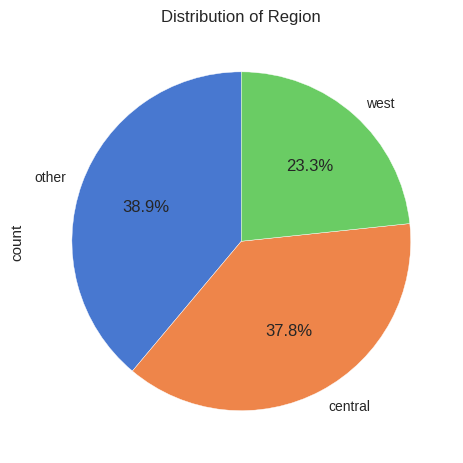

In [211]:
df['region'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
plt.title('Distribution of Region')

# Bar Chart

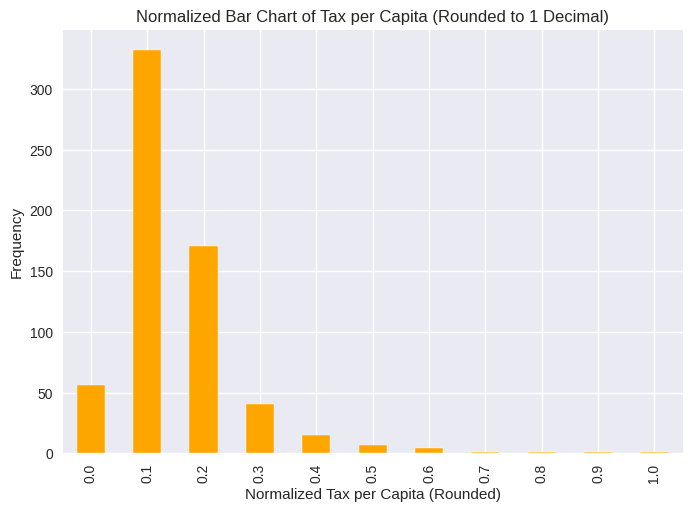

In [212]:
df['taxpc_normalized'] = (df['taxpc'] - df['taxpc'].min()) / (df['taxpc'].max() - df['taxpc'].min())
df['taxpc_normalized'] = df['taxpc_normalized'].round(1)
df['taxpc_normalized'].value_counts().sort_index().plot.bar(color='orange')
plt.title('Normalized Bar Chart of Tax per Capita (Rounded to 1 Decimal)')
plt.xlabel('Normalized Tax per Capita (Rounded)')
plt.ylabel('Frequency')

plt.show()

# Horizontal Bar Chart

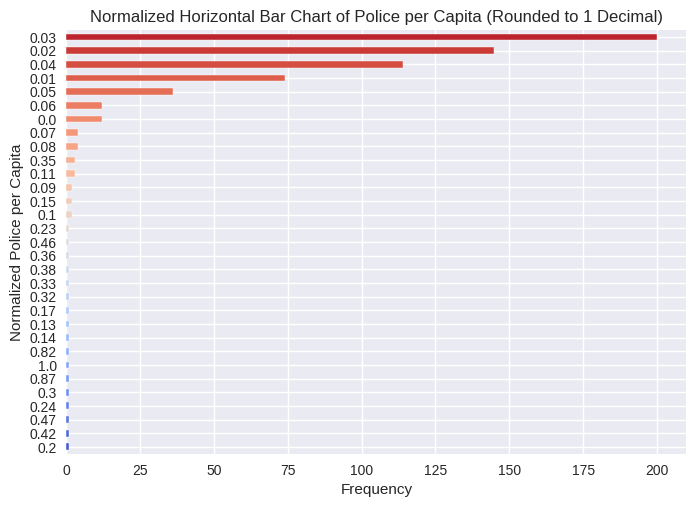

In [213]:
df['polpc_normalized'] = (df['polpc'] - df['polpc'].min()) / (df['polpc'].max() - df['polpc'].min())
df['polpc_normalized'] = df['polpc_normalized'].round(2)
colors = sns.color_palette("coolwarm", len(df['polpc_normalized'].value_counts()))
df['polpc_normalized'].value_counts().sort_values().plot.barh(color=colors)
plt.title('Normalized Horizontal Bar Chart of Police per Capita (Rounded to 1 Decimal)')
plt.xlabel('Frequency')
plt.ylabel('Normalized Police per Capita')
plt.show()

# Line plot

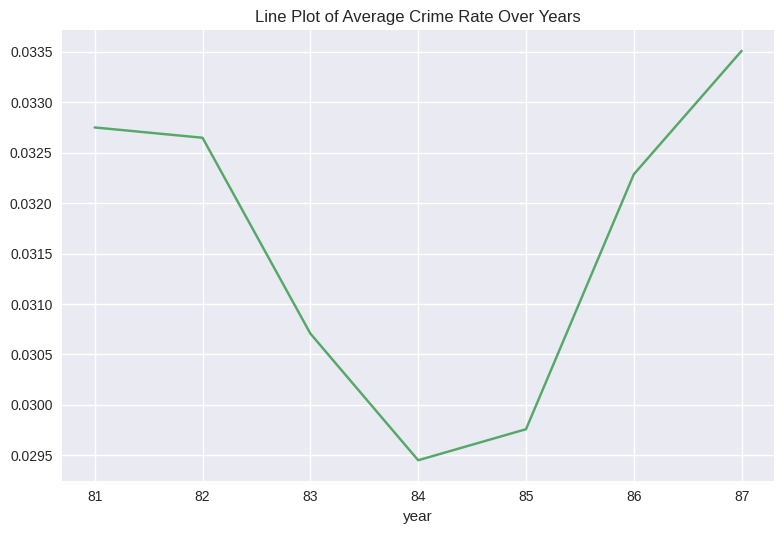

In [214]:
df.groupby('year')['crmrte'].mean().plot.line(color='g')
plt.title('Line Plot of Average Crime Rate Over Years')
plt.tight_layout()
plt.show()

# Box plot

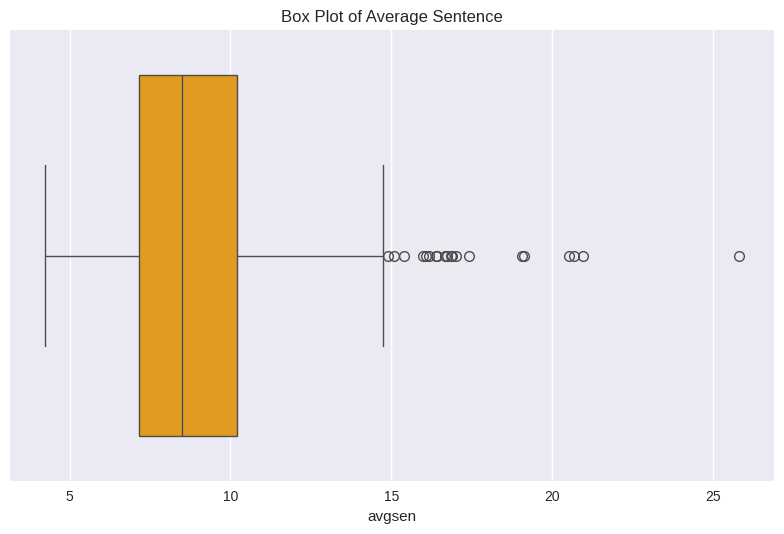

In [215]:
sns.boxplot(x='avgsen', data=df, color='orange')
plt.title('Box Plot of Average Sentence')
plt.tight_layout()
plt.show()

# Distribution of 'density'

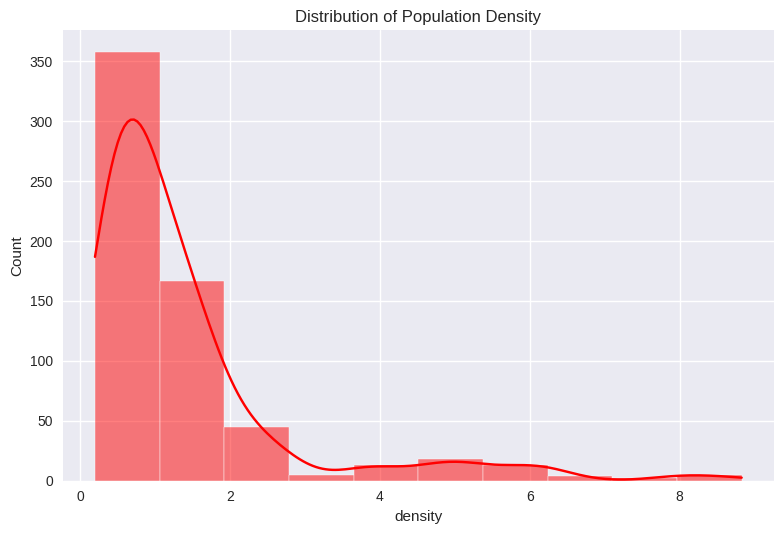

In [216]:
sns.histplot(df['density'], bins=10, kde=True, color='red')
plt.title('Distribution of Population Density')
plt.tight_layout()
plt.show()

# Bivariate Analysis

# Scatter plot

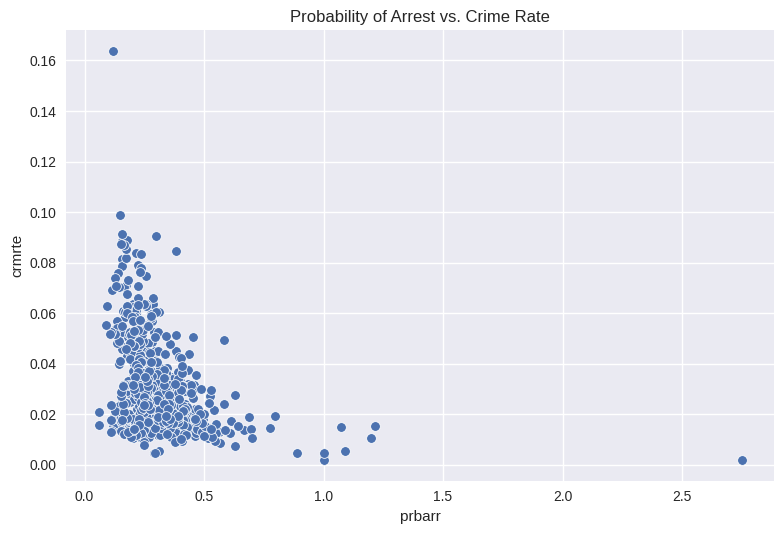

In [217]:
sns.scatterplot(x='prbarr', y='crmrte', data=df)
plt.title('Probability of Arrest vs. Crime Rate')
plt.tight_layout()
plt.show()

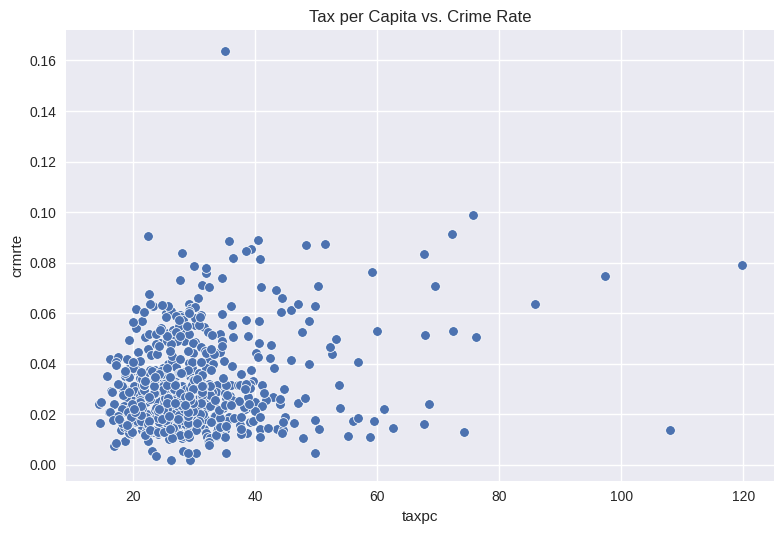

In [218]:
sns.scatterplot(x='taxpc', y='crmrte', data=df)
plt.title('Tax per Capita vs. Crime Rate')
plt.tight_layout()
plt.show()

# Bar plot

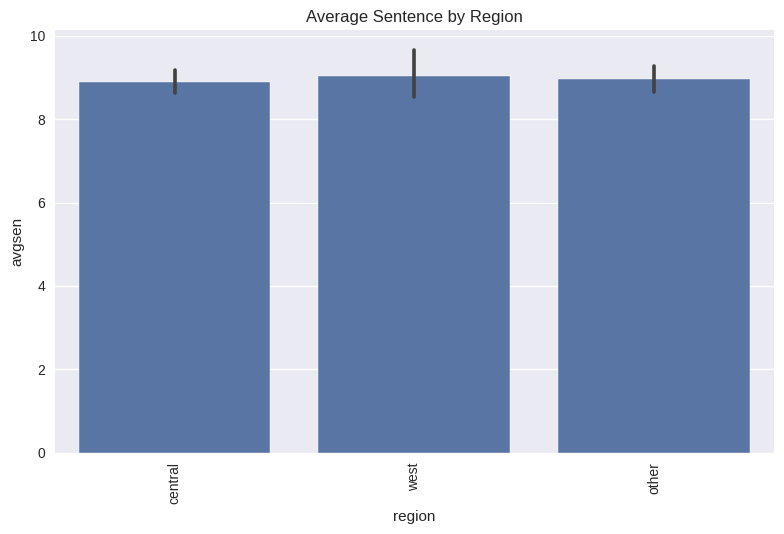

In [219]:
sns.barplot(x='region', y='avgsen', data=df)
plt.title('Average Sentence by Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Box plot

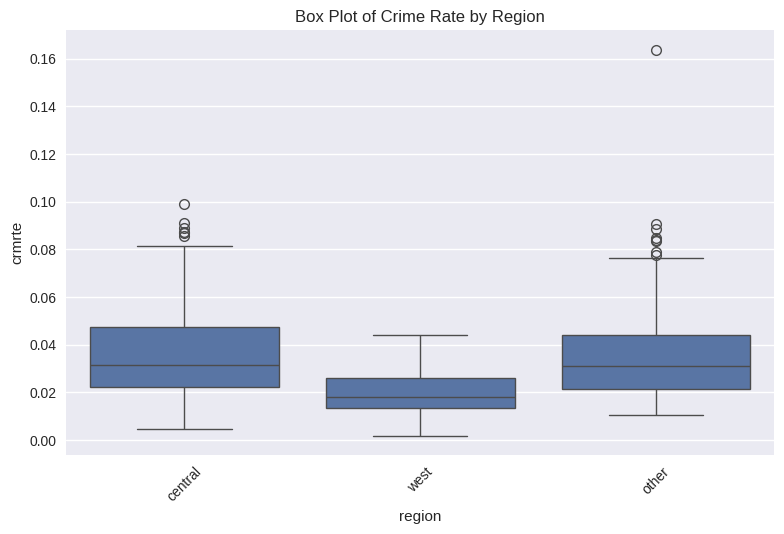

In [220]:
sns.boxplot(x='region', y='crmrte', data=df)
plt.title('Box Plot of Crime Rate by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin Plot

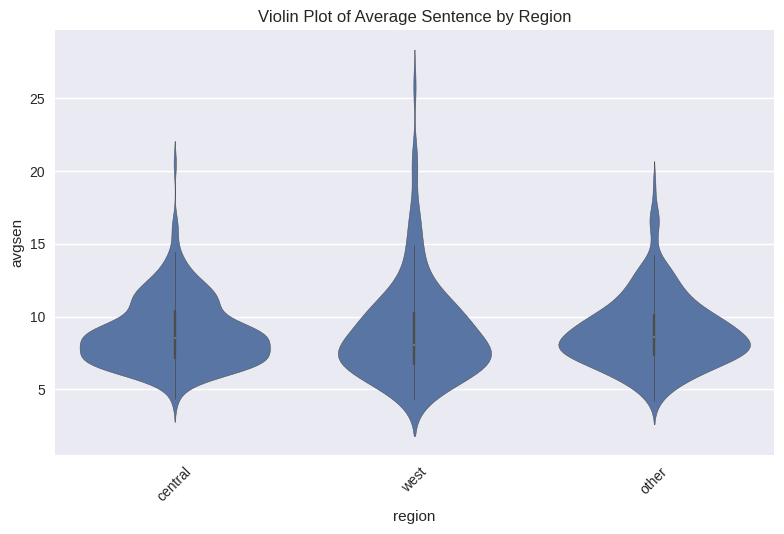

In [221]:
sns.violinplot(x='region', y='avgsen', data=df)
plt.title('Violin Plot of Average Sentence by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line plot

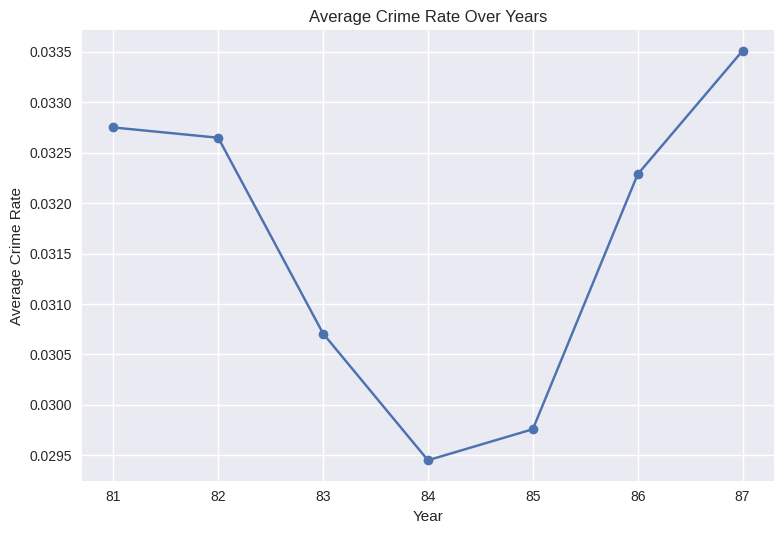

In [222]:
df.groupby('year')['crmrte'].mean().plot.line(marker='o')
plt.title('Average Crime Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Crime Rate')
plt.tight_layout()
plt.show()

# Density plot

<ipython-input-223-88559c44d2df>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['crmrte'], shade=True)


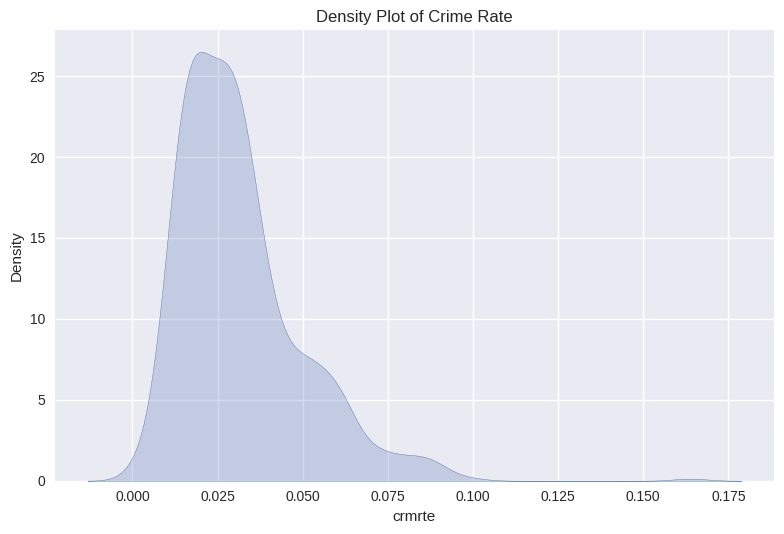

In [223]:
sns.kdeplot(df['crmrte'], shade=True)
plt.title('Density Plot of Crime Rate')
plt.tight_layout()
plt.show()

# Bubble plot

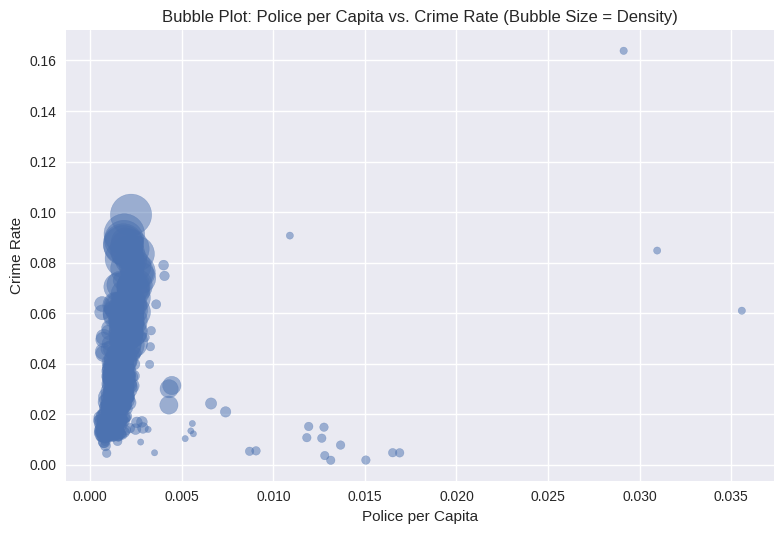

In [224]:
bubble_size = df['density'] * 100
plt.scatter(x='polpc', y='crmrte', s=bubble_size, data=df, alpha=0.5)
plt.title('Bubble Plot: Police per Capita vs. Crime Rate (Bubble Size = Density)')
plt.xlabel('Police per Capita')
plt.ylabel('Crime Rate')

plt.tight_layout()
plt.show()

# Multivariate Analysis

# Pairplot for selected features

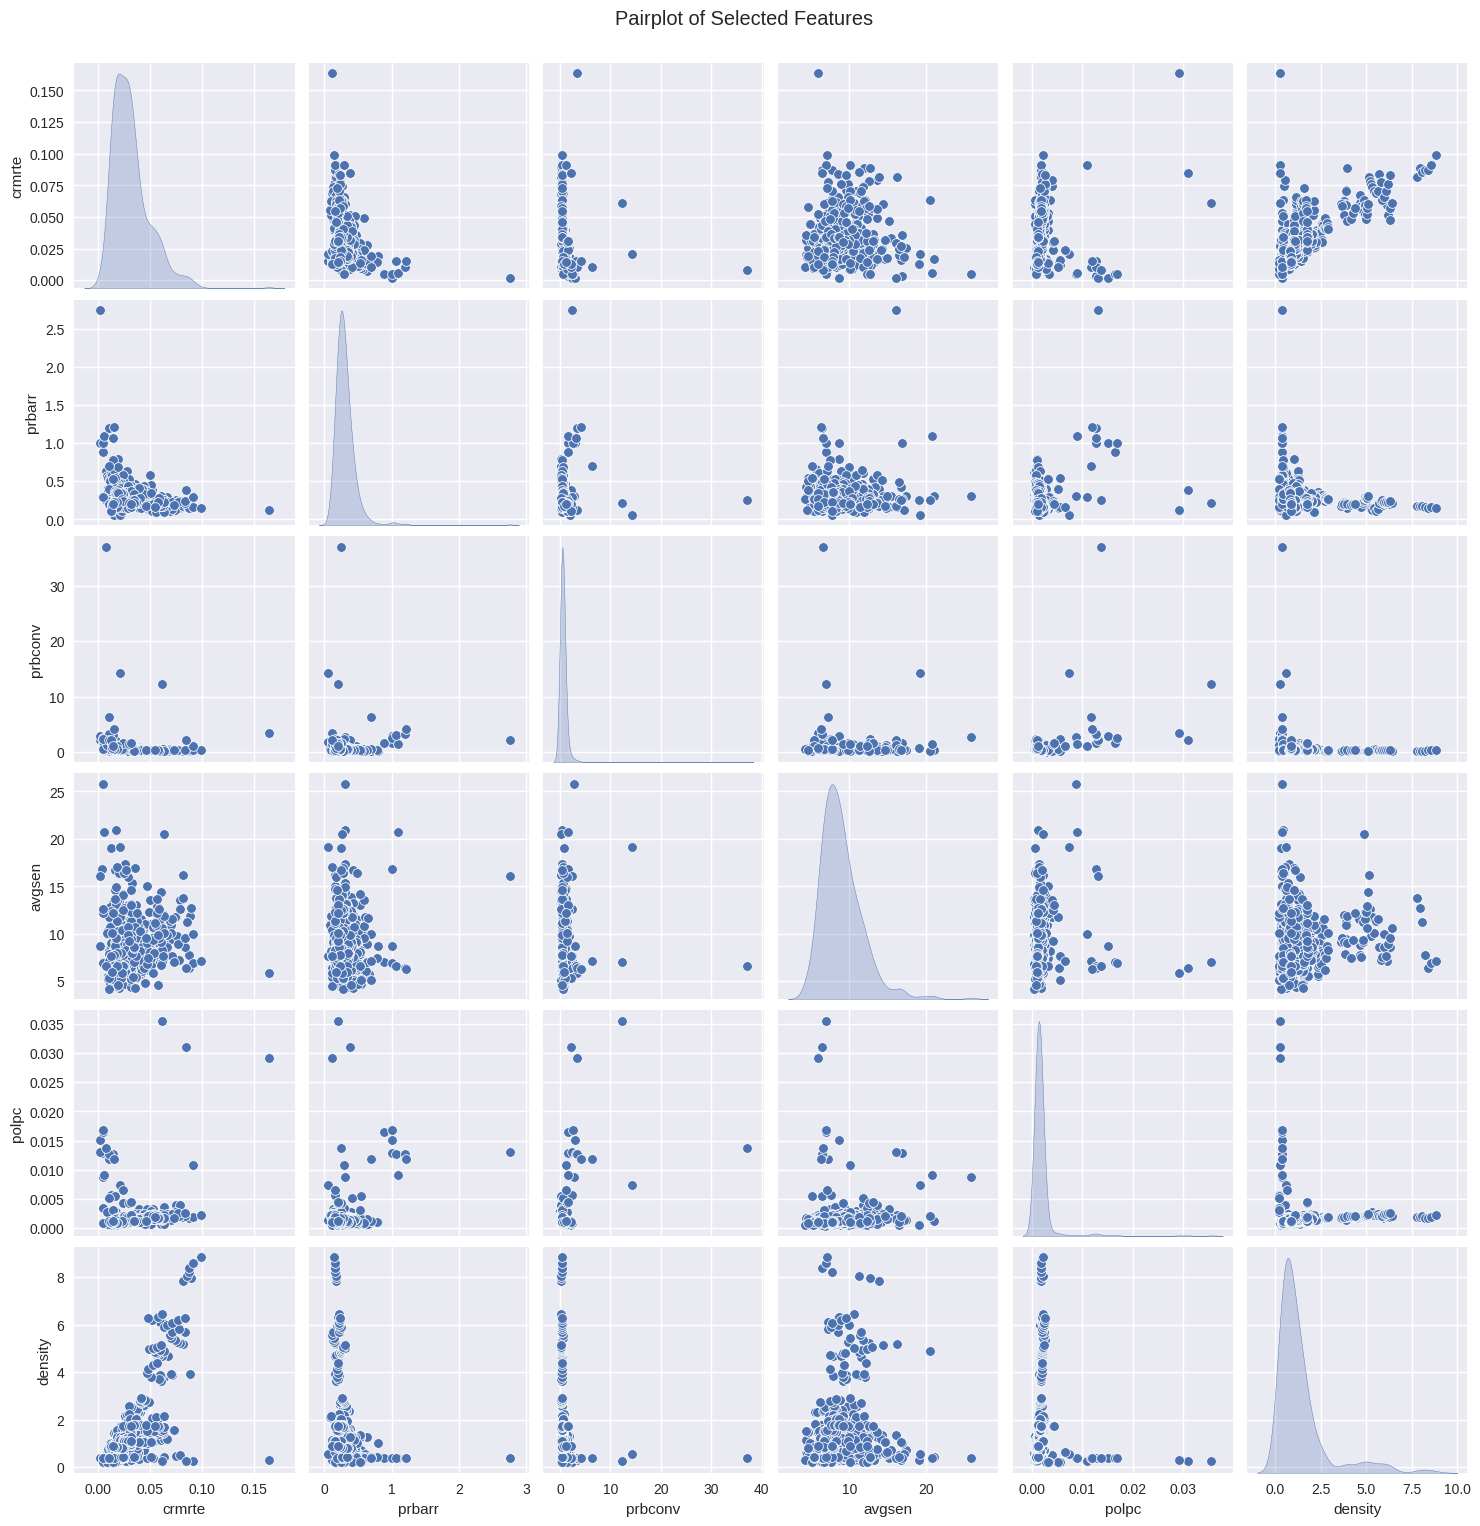

In [225]:
sns.pairplot(df[['crmrte', 'prbarr', 'prbconv', 'avgsen', 'polpc', 'density']], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Heatmap of correlations

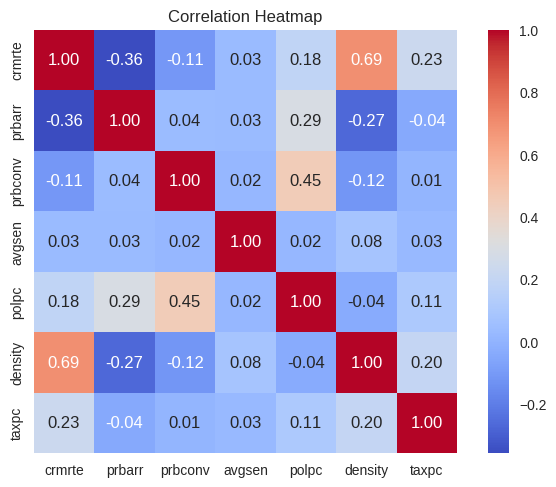

In [226]:
correlation_matrix = df[['crmrte', 'prbarr', 'prbconv', 'avgsen', 'polpc', 'density', 'taxpc']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# Box plot

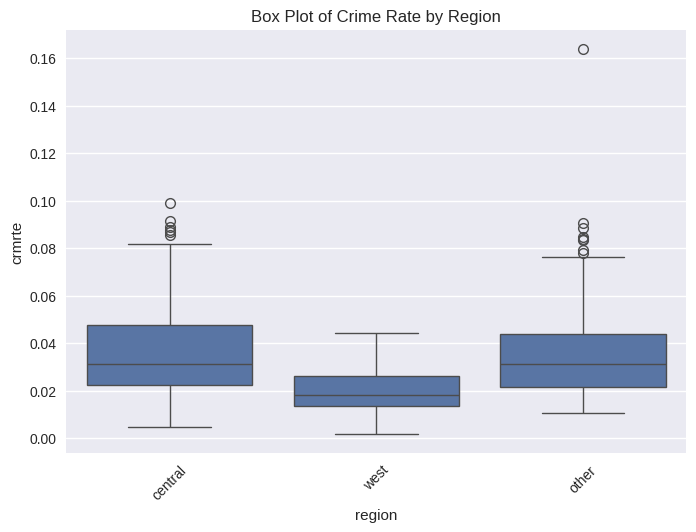

In [227]:
sns.boxplot(x='region', y='crmrte', data=df)
plt.title('Box Plot of Crime Rate by Region')
plt.xticks(rotation=45)
plt.show()

# HeatMap

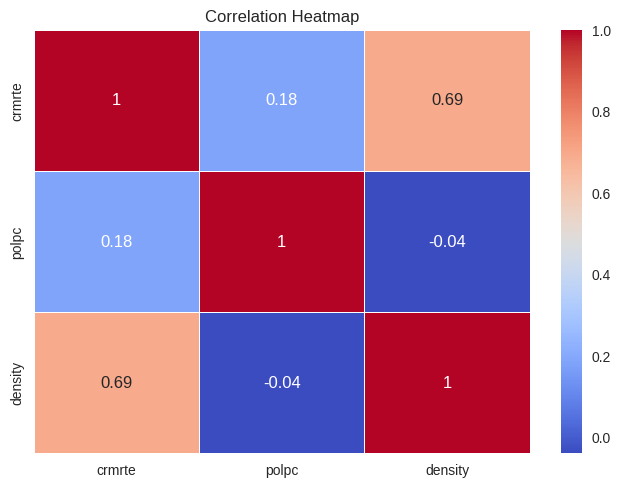

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = df[['crmrte', 'polpc', 'density']]

correlation_matrix = selected_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Time Series

# Create a new column for crime rate per capita

In [229]:
df['crime_rate_per_capita'] = np.where(df['density'] != 0, df['crmrte'] / df['density'], 0)

# Aggregate average crime rate per capita by year

In [230]:
avg_crime_rate_per_capita = df.groupby('year')['crime_rate_per_capita'].mean()
avg_crime_rate_per_capita.index = pd.to_datetime(avg_crime_rate_per_capita.index.astype(str) + '-01-01')

<ipython-input-230-5b867fef2cb8>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  avg_crime_rate_per_capita.index = pd.to_datetime(avg_crime_rate_per_capita.index.astype(str) + '-01-01')


In [231]:
def fix_year_format(year):
    year = int(year)
    if year < 100:
        if year < 50:
            return 2000 + year
        else:
            return 1900 + year
    return year
df['year'] = df['year'].apply(fix_year_format)
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)
crime_rate_ts = df['crmrte']


# Start and end date

In [232]:
start_date = avg_crime_rate_per_capita.index.min()
end_date = avg_crime_rate_per_capita.index.max()

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 1981-01-01 00:00:00
End date: 1987-01-01 00:00:00


# Checking the frequency of the dataset

In [233]:
freq = pd.infer_freq(avg_crime_rate_per_capita.index)
print(f"Frequency: {freq}")

Frequency: AS-JAN


# Summary of the dataset

In [234]:
print(avg_crime_rate_per_capita.describe())

count    7.000000
mean     0.033600
std      0.001798
min      0.030678
25%      0.032754
50%      0.034132
75%      0.034413
max      0.036058
Name: crime_rate_per_capita, dtype: float64


# Plot the average crime rate per capita time series

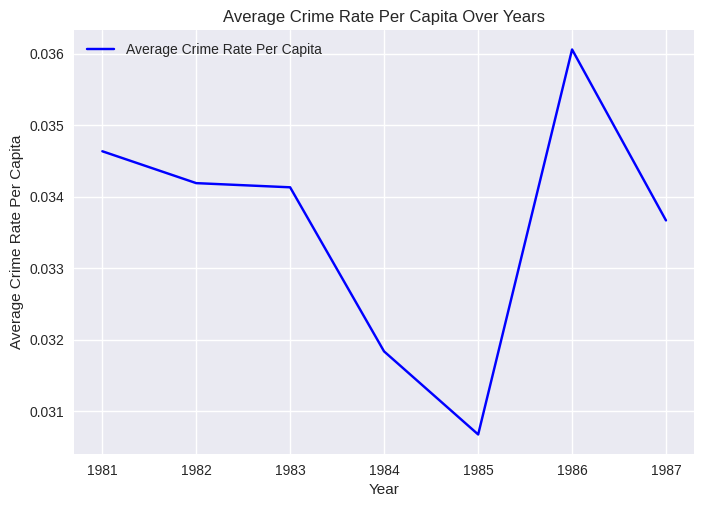

In [235]:
plt.plot(avg_crime_rate_per_capita, label='Average Crime Rate Per Capita', color='blue')
plt.title('Average Crime Rate Per Capita Over Years')
plt.xlabel('Year')
plt.ylabel('Average Crime Rate Per Capita')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the time series

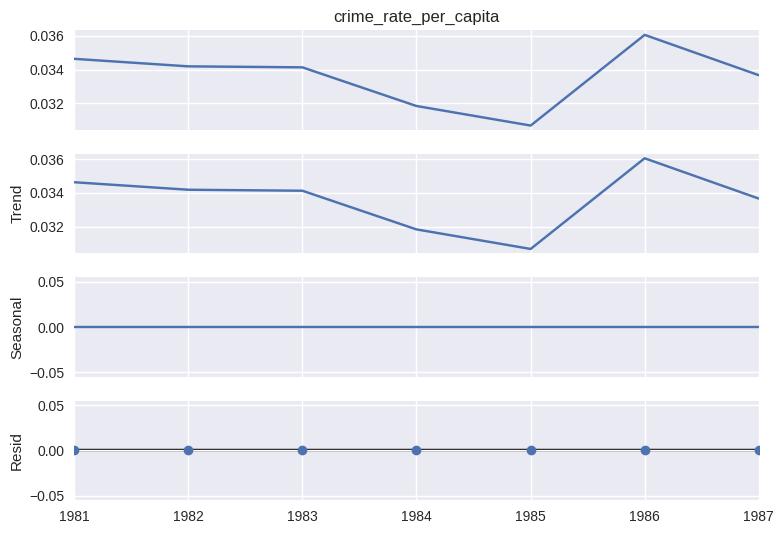

In [236]:
decomposition = seasonal_decompose(avg_crime_rate_per_capita, model='additive')
decomposition.plot()
plt.show()

# Time series plot

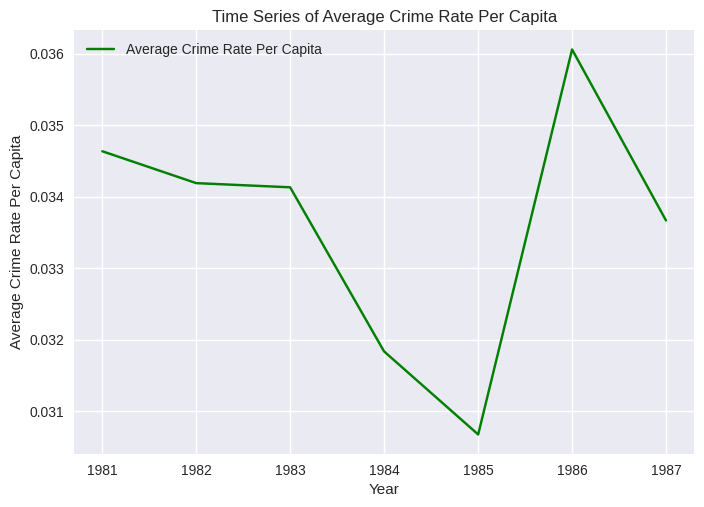

In [237]:
plt.plot(avg_crime_rate_per_capita, label='Average Crime Rate Per Capita', color='green')
plt.title('Time Series of Average Crime Rate Per Capita')
plt.xlabel('Year')
plt.ylabel('Average Crime Rate Per Capita')
plt.legend()
plt.grid(True)
plt.show()

# Fit a linear regression model

In [238]:
X = np.arange(len(avg_crime_rate_per_capita)).reshape(-1, 1)  # Use time steps as the independent variable
y = avg_crime_rate_per_capita.values

model = LinearRegression()
model.fit(X, y)

trend = model.predict(X)

# Plot with the regression line

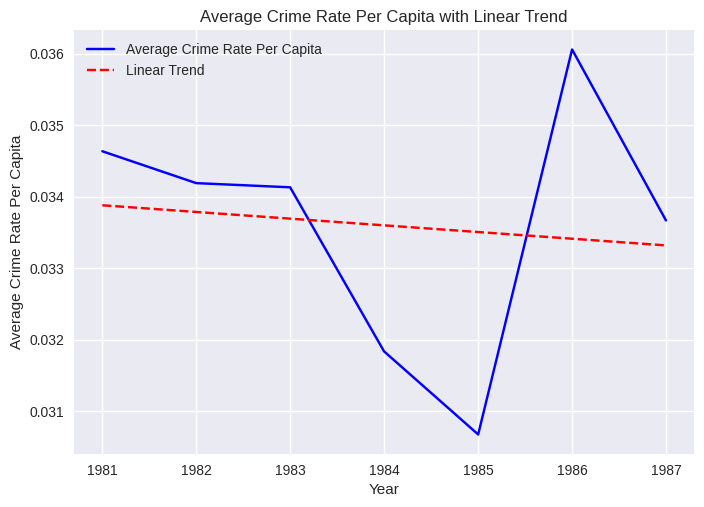

In [239]:
plt.plot(avg_crime_rate_per_capita.index, y, label='Average Crime Rate Per Capita', color='blue')
plt.plot(avg_crime_rate_per_capita.index, trend, color='red', linestyle='--', label='Linear Trend')
plt.title('Average Crime Rate Per Capita with Linear Trend')
plt.xlabel('Year')
plt.ylabel('Average Crime Rate Per Capita')
plt.legend()
plt.grid(True)
plt.show()

# For yearly datasets, we use cycle() to find repeating patterns


In [240]:
cycle = avg_crime_rate_per_capita.index.year
print(f"Cycle: {cycle}")

Cycle: Index([1981, 1982, 1983, 1984, 1985, 1986, 1987], dtype='int32', name='year')


#Log Tranform to stabilize variance

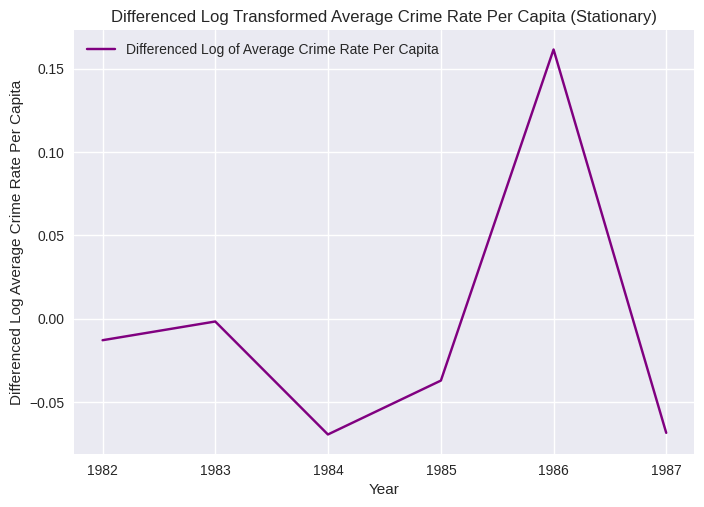

In [241]:
log_avg_crime_rate_per_capita = np.log(avg_crime_rate_per_capita)

diff_log_avg_crime_rate_per_capita = log_avg_crime_rate_per_capita.diff().dropna()

plt.plot(diff_log_avg_crime_rate_per_capita, label='Differenced Log of Average Crime Rate Per Capita', color='purple')
plt.title('Differenced Log Transformed Average Crime Rate Per Capita (Stationary)')
plt.xlabel('Year')
plt.ylabel('Differenced Log Average Crime Rate Per Capita')
plt.legend()
plt.grid(True)
plt.show()

# Boxplot for seasonal effect across years

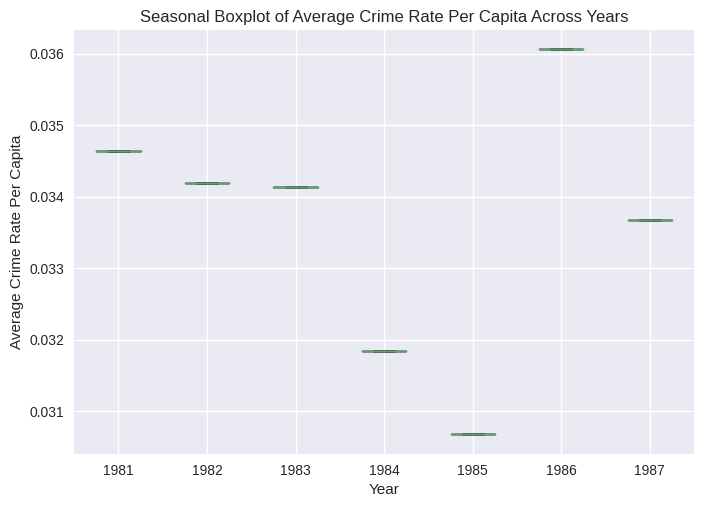

In [242]:
plt.boxplot([avg_crime_rate_per_capita[avg_crime_rate_per_capita.index.year == year] for year in avg_crime_rate_per_capita.index.year.unique()],
            labels=avg_crime_rate_per_capita.index.year.unique())
plt.title('Seasonal Boxplot of Average Crime Rate Per Capita Across Years')
plt.xlabel('Year')
plt.ylabel('Average Crime Rate Per Capita')
plt.grid(True)
plt.show()